##### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data explanation
- The data below the headers **TV**, **radio**, and **newspaper** represents the amount of money, in thousands of dollars, spent on each form of advertising. These are the features for our model.
- The data below the header **sales** represents the number of sales of a product, in thousands of items, which was advertised. 

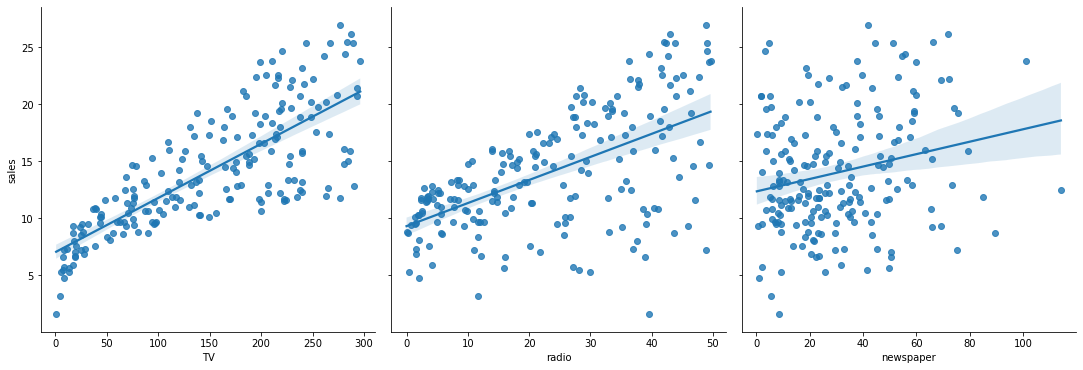

In [3]:
# let's plot sales against each feature 
sns.pairplot(data, x_vars=["TV", "radio", "newspaper"], y_vars="sales", kind='reg', aspect=1, height=5)

- As shown by the three graphs, there is a strong positive relationship between TV advertising and sales, and a strong positive relationship between radio advertising and sales, but we see no relationship between newspaper advertising and sales. 
- As a result, let's exclude the newspaper feature from training our model, as it seems it may just act as noise.

##### Let's confirm that the newspaper feature does not improve our model accuracy 
To do this, we'll train two models, one with the newspaper feature, and the other without. Then we will use a root mean squared error method to compare our two models. 

In [4]:
# Model 1: including all features
X = data[["TV", "radio", "newspaper"]] 
y = data["sales"] 

# Instantiating our linear regression model and fitting it with our dataset
lin_reg = LinearRegression()

# Splitting our dataset to training data and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

# Train our data with the training set, and producing prediction results from our testing set 
lin_reg.fit(X_train, y_train) 
y_pred = lin_reg.predict(X_test) 

# Evaluating our model's accuracy using the root mean squared error 
print("The RMSE when including the newspaper feature is " + str(np.sqrt(mean_squared_error(y_test, y_pred))))


The RMSE when including the newspaper feature is 1.404651423032895


In [7]:
# Model 2: excluding the newspaper feature 
X = data[["TV", "radio"]]
y = data["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
lin_reg.fit(X_train, y_train) 
y_pred = lin_reg.predict(X_test) 
print("The RMSE when excluding the newspaper feature is " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

The RMSE when excluding the newspaper feature is 1.3879034699382886


##### This confirms that we should exclude the newspaper feature in order to have a more accurate model. 
So let's train our final model, this time using the full data set for the TV and radio features to fit our model. 

In [ ]:
# Final model 
lin_reg.fit(X, y) 